In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 3

In [55]:
features = pd.read_excel('DailyActivities.xlsx')
features

,Area of Interest,Charles,Henry,Susan
0,Work,8.5,9.5,7.0
1,Family,0.5,1.0,1.5
2,Homeworks,3.0,2.0,1.0
3,Individual,1.0,1.5,2.5
4,Socializing,1.5,0.5,2.0
5,Spare Time,3.0,2.5,2.0
6,Sleep,6.5,7.0,8.0


Text(0.5, 1.0, 'Time Spent on Daily Activities')

<Figure size 3000x600 with 0 Axes>

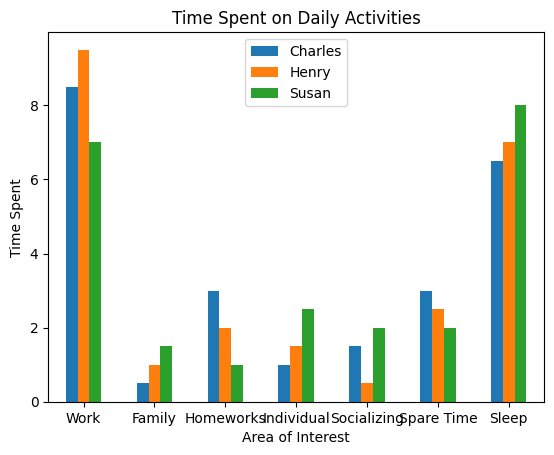

In [56]:
# Set 'Area of Interest' as index for plotting
features.set_index('Area of Interest', inplace=True)
plt.figure(figsize=(30, 6)) 
# Plotting
ax = features.plot.bar(rot=0)  # Rotating x-labels to horizontal

# Set labels and title
ax.set_xlabel('Area of Interest')
ax.set_ylabel('Time Spent')
ax.set_title('Time Spent on Daily Activities')

### Question 4

In [62]:
vaccination = pd.read_csv('country_vaccination_stats.csv')
vaccination

,country,date,daily_vaccinations,vaccines
0,Argentina,12/29/2020,NaN,Sputnik V
1,Argentina,12/30/2020,15656.0,Sputnik V
2,Argentina,12/31/2020,15656.0,Sputnik V
3,Argentina,1/1/2021,11070.0,Sputnik V
4,Argentina,1/2/2021,8776.0,Sputnik V
...,...,...,...,...
1497,Wales,1/20/2021,11105.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1498,Wales,1/21/2021,12318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1499,Wales,1/22/2021,15148.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1500,Wales,1/23/2021,17371.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [77]:
mapping = vaccination.dropna(subset=['country']).groupby('country')['daily_vaccinations'].min().to_dict()
mapping = {k: v if pd.notnull(v) else 0 for k, v in mapping.items()}

In [79]:
for index, row in vaccination[vaccination['daily_vaccinations'].isnull()].iterrows():
    vaccination.at[index, 'daily_vaccinations'] = mapping[row['country']]

In [89]:
vaccination['daily_vaccinations'].isnull().sum()

0